In [ ]:
pip install geopandas

In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 28.6 MB/s eta 0:00:00


In [ ]:
pip install elapid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bio_clim='/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/'

In [ ]:
# Creates a list of bioclimate variables by iterating through files in the "bio_clim" directory and selecting only those files with the ".tif" extension
bioclimate_variables=[os.path.join(bio_clim,f) for f in os.listdir(bio_clim) if f.endswith(".tif")]


In [ ]:
# Function to extract the Bioclimatic Variable Number from the path

def extract_number(path):
    # Extract the number using regular expression
    match = re.search(r'Bio_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Sort the paths based on the extracted number
sorted_paths = sorted(bioclimate_variables, key=extract_number)

# Print the sorted paths
for bioclimate_variables in sorted_paths:
    print(bioclimate_variables)

# Save the sorted paths in a list
bioclimate_variables = list(sorted_paths)

/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_1_Annual_mean_Temperature_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_2_Mean_Diurnal_Range_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_3_Isothermality_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_4_Temperature_Seasonality_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_5_Maximum_Temperature_of_Warmest_Month_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_6_Minimum_Temperature_of_Coldest_Month_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_7_Temperature_Annual_Range_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_8_Mean_Temperature_of_Wett

In [ ]:
# Add the Labels for Map
# Read the file path and split them, since we need only bioclim variables names

labels = []  # Initialize labels as an empty list
for i in bioclimate_variables:
    filename = os.path.basename(i)
    filename_without_extension = os.path.splitext(filename)[0]
    labels.append(filename_without_extension)
print(labels)

['Bio_1_Annual_mean_Temperature_WC_1970_2000', 'Bio_2_Mean_Diurnal_Range_WC_1970_2000', 'Bio_3_Isothermality_WC_1970_2000', 'Bio_4_Temperature_Seasonality_WC_1970_2000', 'Bio_5_Maximum_Temperature_of_Warmest_Month_1970_2000', 'Bio_6_Minimum_Temperature_of_Coldest_Month_WC_1970_2000', 'Bio_7_Temperature_Annual_Range_WC_1970_2000', 'Bio_8_Mean_Temperature_of_Wettest_Quarter_WC_1970_2000', 'Bio_9_Mean_Temperature_of_Driest_Quarter_WC_1970_2000', 'Bio_10_Mean_Temperature_of_Warmest_Quarter_WC_1970_2000', 'Bio_11_Mean_Temperature_of_Coldest_Quarter_WC_1970_2000', 'Bio_12_Annual_Precipitation_WC_1970_2000', 'Bio_13_Precipitation_of_Wettest_Month_WC_1970_2000', 'Bio_14_Precipitation_of_Driest_Month_WC_1970_2000', 'Bio_15_Precipitation_of_Seasonality_WC_1970_2000', 'Bio_16_Precipitation_of_Wettest_Quarter_WC_1970_2000', 'Bio_17_Precipitation_of_Driest_Quarter_WC_1970_2000', 'Bio_18_Precipitation_of_Warmest_Quarter_WC_1970_2000', 'Bio_19_Precipitation_of_Coldest_Quarter_WC_1970_2000']


In [ ]:
vector='/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/BrownStinkBug(2007-2023).gpkg'

In [ ]:
# read the presence data, draw background point samples
presence = gpd.read_file(vector)

In [ ]:
presence.head()

,Unnamed_ 0,species,occurrence,latitude,longitude,day,month,Year,speciesKey,geometry
0,0,Halyomorpha halys,California,34.016747,-118.287683,2014-03-13T00:00:00,13.0,2014.0,4485843.0,POINT (-118.28768 34.01675)
1,1,Halyomorpha halys,Pennsylvania,40.518756,-79.807043,2014-03-30T09:31:31,30.0,2014.0,4485843.0,POINT (-79.80704 40.51876)
2,2,Halyomorpha halys,Pennsylvania,40.018108,-77.553892,2013-09-29T12:14:00,29.0,2013.0,4485843.0,POINT (-77.55389 40.01811)
3,3,Halyomorpha halys,Ohio,41.101445,-81.441779,2013-09-20T00:00:00,20.0,2013.0,4485843.0,POINT (-81.44178 41.10144)
4,4,Halyomorpha halys,Vermont,44.016878,-73.178033,2013-10-02T00:00:00,2.0,2013.0,4485843.0,POINT (-73.17803 44.01688)


In [ ]:
# Clears the output in IPython display
from IPython.display import clear_output


# Define the "plot_surface" Function to display the selected BioClim Variable
def plot_surface(bio_clim):
    #
    fig, ax = plt.subplots(figsize=(6, 6))

    with rio.open(bio_clim, 'r') as src:
        profile = src.profile.copy()

        # Low temperatures are dark grey, high temperatures are light grey
        rioplot.show(src, ax=ax, cmap="turbo")

        # Overlay the stingbug data
        presence.to_crs(src.crs).plot(column='ComName', ax=ax, legend=True,cmap='pink')

    plt.show()

# Define the "on_file_selection" Function to select the BioClim Variable
def on_file_selection(change):
    if change.new: # checks if a new file has been selected
        bio_clim = change.new
        with output_area:  # It allows controlling where the output is displayed
            clear_output(wait=True)
            # Extract the module name from the file path
            module_name = os.path.basename(bio_clim)
            print(f"Title: {module_name}")  # Print the selected module name
            plot_surface(bio_clim) # Call the plot_surface function

# Create the dropdown widget with raster names
file_widget = widgets.Dropdown(options=bioclimate_variables, description='Select a file')

# Display the file selection widget and output area
output_area = widgets.Output()

# Display the file selection widget and output area
output_area = widgets.Output()

# Call the plot_surface function when file(s) are selected
file_widget.observe(on_file_selection, names='value')

display(file_widget, output_area)

Dropdown(description='Select a file', options=('/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip…

Output()

# Bio_1_Annual_mean_Temperature_WC

In [ ]:
background = ela.sample_raster(bioclimate_variables[0], count=10_000)
background.head()

0    POINT (-116.99341 38.67017)
1     POINT (-90.35826 33.35398)
2     POINT (-87.52828 34.68303)
3    POINT (-109.83522 34.84916)
4     POINT (-84.03241 30.69589)
dtype: geometry

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-118.28768 34.01675),1
1,POINT (-79.80704 40.51876),1
2,POINT (-77.55389 40.01811),1
3,POINT (-81.44178 41.10144),1
4,POINT (-73.17803 44.01688),1


In [ ]:
merged[merged['class']==1]

,geometry,class
0,POINT (-118.28768 34.01675),1
1,POINT (-79.80704 40.51876),1
2,POINT (-77.55389 40.01811),1
3,POINT (-81.44178 41.10144),1
4,POINT (-73.17803 44.01688),1
...,...,...
19471,POINT (-118.23117 34.07120),1
19472,POINT (-118.13132 34.19016),1
19473,POINT (-81.49237 39.52376),1
19474,POINT (-78.20362 38.83602),1


In [ ]:
merged[merged['class']==0]

,geometry,class
19476,POINT (-116.99341 38.67017),0
19477,POINT (-90.35826 33.35398),0
19478,POINT (-87.52828 34.68303),0
19479,POINT (-109.83522 34.84916),0
19480,POINT (-84.03241 30.69589),0
...,...,...
29471,POINT (-78.70538 42.32505),0
29472,POINT (-82.86713 34.84916),0
29473,POINT (-99.34763 45.48154),0
29474,POINT (-119.15752 35.18142),0


In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b01,b02,b03,b04,b05,b06,b07,b08,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,POINT (-118.28768 34.01675),1,18.559376,13.309167,56.353584,378.932434,30.962749,7.34550,23.617249,14.636708,...,23.524166,14.247458,406.0,93.0,1.0,101.792198,257.0,6.0,11.0,234.0
1,POINT (-79.80704 40.51876),1,11.107208,12.445541,34.128464,909.136963,29.682249,-6.78450,36.466751,20.085791,...,22.064291,-0.366750,979.0,101.0,59.0,17.619282,300.0,195.0,291.0,195.0
2,POINT (-77.55389 40.01811),1,10.922198,11.387854,31.841444,914.753479,29.088501,-6.67575,35.764252,19.888874,...,21.957167,-0.634583,1052.0,105.0,69.0,11.948630,299.0,222.0,279.0,222.0
3,POINT (-81.44178 41.10144),1,9.731438,10.805416,29.747730,942.643799,28.077000,-8.24650,36.323502,18.935833,...,21.015541,-2.282333,975.0,101.0,56.0,17.596754,288.0,193.0,284.0,193.0
4,POINT (-73.17803 44.01688),1,7.437573,11.868063,29.106224,1035.593872,27.834999,-12.94000,40.774998,18.703541,...,19.821791,-5.863167,903.0,103.0,49.0,19.914061,277.0,168.0,268.0,173.0


In [ ]:
# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc1 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc1:0.3f}")



Training AUC score: 0.932


In [ ]:
# write the model predictions to disk
output_raster = 'Annual_mean_Temperature_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

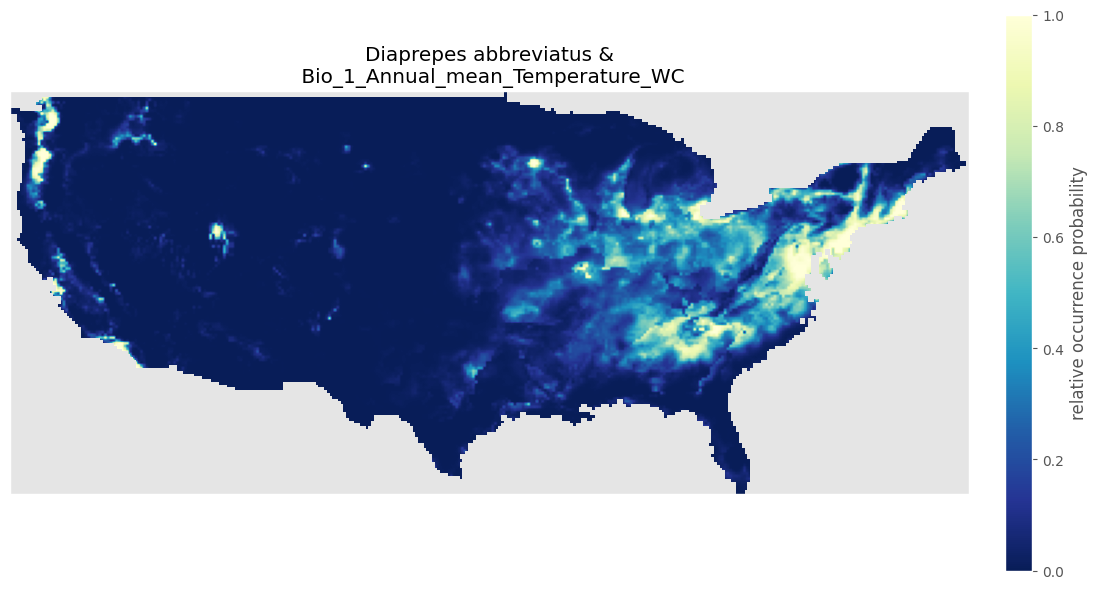

In [ ]:
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus &\n Bio_1_Annual_mean_Temperature_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_2_Mean_Diurnal_Range_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[1], count=10_000)
background.head()

0    POINT (-103.00996 43.65410)
1     POINT (-86.03005 37.67339)
2    POINT (-118.65811 45.14928)
3    POINT (-103.50937 37.17500)
4    POINT (-105.50700 44.98315)
dtype: geometry

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-118.28768 34.01675),1
1,POINT (-79.80704 40.51876),1
2,POINT (-77.55389 40.01811),1
3,POINT (-81.44178 41.10144),1
4,POINT (-73.17803 44.01688),1


In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc2 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc2:0.3f}")

Training AUC score: 0.932


In [ ]:
# save the fitted model to disk
ela.save_object(model, 'demo-maxent-model2.ela')

# write the model predictions to disk
output_raster = 'Mean_Diurnal_Range_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


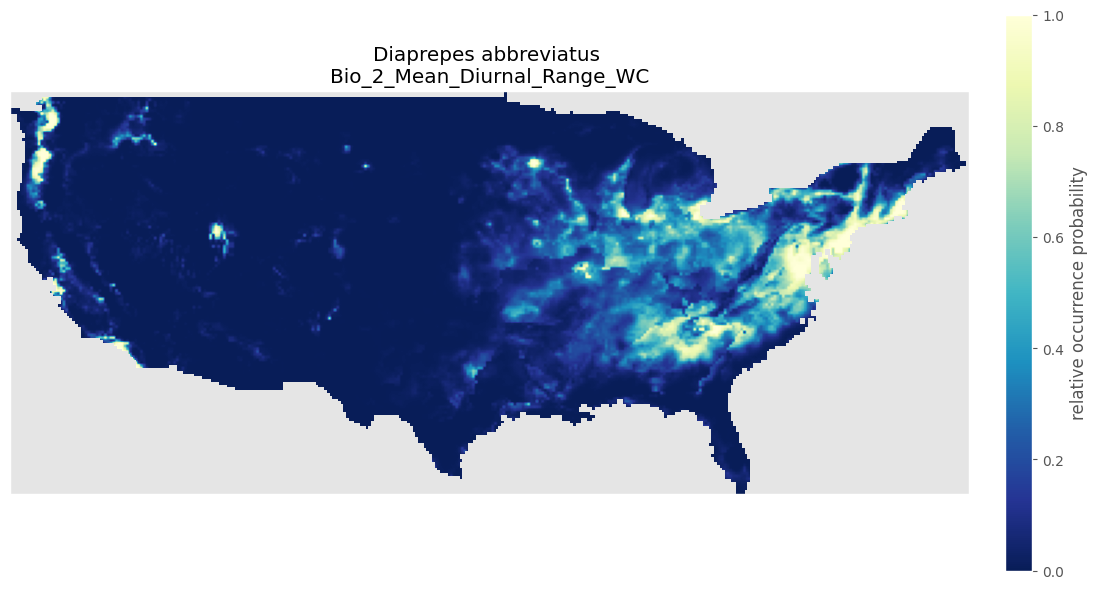

In [ ]:
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_2_Mean_Diurnal_Range_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_3_Isothermality_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[2], count=10_000)
background.head()

0    POINT (-113.83049 33.85238)
1    POINT (-112.66520 39.50083)
2    POINT (-100.67938 47.47511)
3    POINT (-118.32517 44.65089)
4     POINT (-77.37363 39.16857)
dtype: geometry

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-118.28768 34.01675),1
1,POINT (-79.80704 40.51876),1
2,POINT (-77.55389 40.01811),1
3,POINT (-81.44178 41.10144),1
4,POINT (-73.17803 44.01688),1


In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc3 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc3:0.3f}")

Training AUC score: 0.932


In [ ]:

# write the model predictions to disk
output_raster = 'Isothermality_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

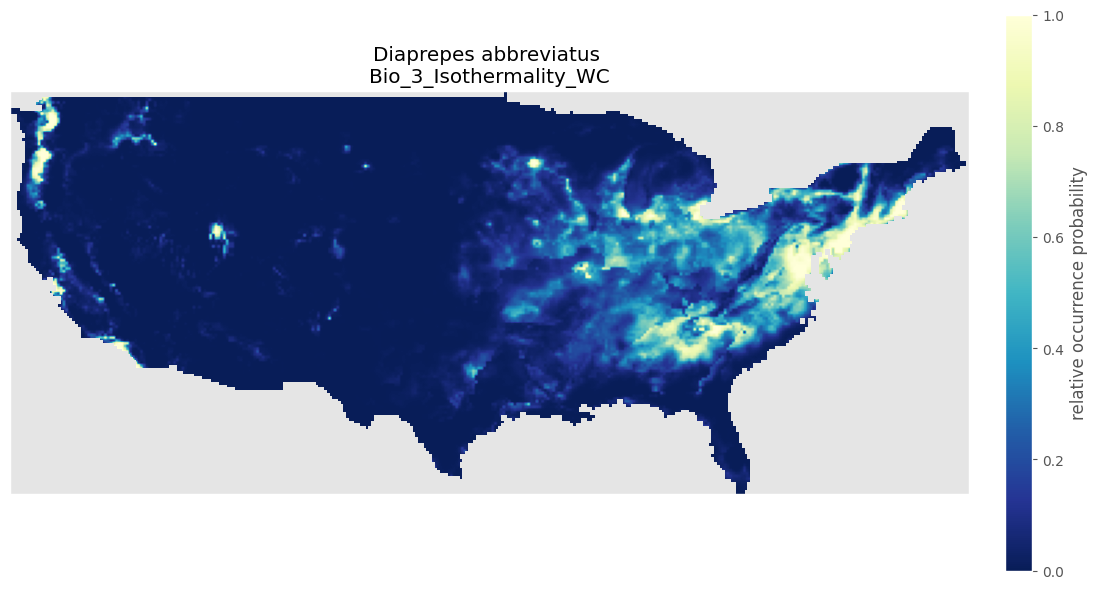

In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_3_Isothermality_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_4_Temperature_Seasonality_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[3], count=10_000)
background.head()

0    POINT (-109.16934 42.98958)
1    POINT (-109.00287 41.82666)
2    POINT (-120.82222 45.14928)
3    POINT (-102.17761 39.16857)
4     POINT (-67.71838 45.48154)
dtype: geometry

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-118.28768 34.01675),1
1,POINT (-79.80704 40.51876),1
2,POINT (-77.55389 40.01811),1
3,POINT (-81.44178 41.10144),1
4,POINT (-73.17803 44.01688),1


In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc4 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc4:0.3f}")

In [ ]:
# save the fitted model to disk
ela.save_object(model, 'demo-maxent-model4.ela')

# write the model predictions to disk
output_raster = 'Temperature_Seasonality_WC.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_4_Temperature_Seasonality_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_5_Maximum_Temperature_of_Warmest_Month_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[4], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc5 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc5:0.3f}")

In [ ]:
# save the fitted model to disk
ela.save_object(model, 'demo-maxent-model5.ela')

# write the model predictions to disk
output_raster = 'Maximum_Temperature_of_Warmest_Month_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:
   # plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_5_Maximum_Temperature_of_Warmest_Month')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_6_Minimum_Temperature_of_Coldest_Month_WC.tif


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[5], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc5 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc5:0.3f}")

In [ ]:

# write the model predictions to disk
output_raster = 'Minimum_Temperature_of_Coldest_Month_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:
 # plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_6_Minimum_Temperature_of_Coldest_Month')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_7_Temperature_Annual_Range_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[6], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc7 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc7:0.3f}")

In [ ]:

# write the model predictions to disk
output_raster = 'Temperature_Annual_Range_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_7_Temperature_Annual_Range')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_8_Mean_Temperature_of_Wettest_Quarter_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[7], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc8 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc8:0.3f}")

In [ ]:
# write the model predictions to disk
output_raster = 'Mean_Temperature_of_Wettest_Quarter_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_8_Mean_Temperature_of_Wettest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_9_Mean_Temperature_of_Driest_Quarter_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[8], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc9 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc9:0.3f}")

In [ ]:
# save the fitted model to disk
ela.save_object(model, 'demo-maxent-model9.ela')

# write the model predictions to disk
output_raster = 'Mean_Temperature_of_Driest_Quarter_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_9_Mean_Temperature_of_Driest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_10_Mean_Temperature_of_Warmest_Quarter_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[9], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc10 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc10:0.3f}")

In [ ]:
# write the model predictions to disk
output_raster = 'Mean_Temperature_of_Warmest_Quarter_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_10_Mean_Temperature_of_Warmest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_11_Mean_Temperature_of_Coldest_Quarter_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[10], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc11 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc11:0.3f}")

In [ ]:

# write the model predictions to disk
output_raster = 'Mean_Temperature_of_Coldest_Quarter_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_11_Mean_Temperature_of_Coldest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_12_Annual_Precipitation_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[11], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc12 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc12:0.3f}")

In [ ]:

# write the model predictions to disk
output_raster = 'Annual_Precipitation_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_12_Annual_Precipitation_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_13_Precipitation_of_Wettest_Month_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[12], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc13 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc13:0.3f}")

In [ ]:
# save the fitted model to disk
ela.save_object(model, 'demo-maxent-model13.ela')

# write the model predictions to disk
output_raster = 'Precipitation_of_Wettest_Month_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_13_Precipitation_of_Wettest_Month')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_14_Precipitation_of_Driest_Month_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[13], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc14 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc14:0.3f}")

In [ ]:

# write the model predictions to disk
output_raster = 'Precipitation_of_Driest_Month_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_14_Precipitation_of_Driest_Month')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_15_Precipitation_of_Seasonality_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[14], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc15 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc15:0.3f}")

In [ ]:

# write the model predictions to disk
output_raster = 'Precipitation_of_Seasonality_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_15_Precipitation_of_Seasonality')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_16_Precipitation_of_Wettest_Quarter_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[15], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc16 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc16:0.3f}")

In [ ]:
# write the model predictions to disk
output_raster = 'Precipitation_of_Wettest_Quarter_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Diaprepes abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_17_Precipitation_of_Driest_Quarter_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[16], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc16 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc16:0.3f}")

In [ ]:
# write the model predictions to disk
output_raster = 'Precipitation_of_Driest_Quarter_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_16_Precipitation_of_Wettest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_18_Precipitation_of_Warmest_Quarter_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[17], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc18 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc18:0.3f}")

In [ ]:
# write the model predictions to disk
output_raster = 'Precipitation_of_Warmest_Quarter_WC_Prediction.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_18_Precipitation_of_Warmest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_19_Precipitation_of_Coldest_Quarter_WC.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[18], count=10_000)
background.head()

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
# evaluate training performance
ypred = model.predict(x)
auc19 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc19:0.3f}")

In [ ]:

# write the model predictions to disk
output_raster = 'Precipitation_of_Coldest_Quarter_WC_Prediction.tif'

#Applies a trained model to a list of raster datasets
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


In [ ]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_19_Precipitation_of_Coldest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
#List of output raster filenames
output_rasters = [
    'Annual_mean_Temperature_WC_Prediction.tif',
    'Mean_Diurnal_Range_WC_Prediction.tif',
    'Isothermality_WC_Prediction.tif',
    'Temperature_Seasonality_WC.tif',
    'Maximum_Temperature_of_Warmest_Month_WC_Prediction.tif',
    'Minimum_Temperature_of_Coldest_Month_WC_Prediction.tif',
    'Temperature_Annual_Range_WC_Prediction.tif',
    'Mean_Temperature_of_Wettest_Quarter_WC_Prediction.tif',
    'Mean_Temperature_of_Driest_Quarter_WC_Prediction.tif',
    'Mean_Temperature_of_Warmest_Quarter_WC_Prediction.tif',
    'Mean_Temperature_of_Coldest_Quarter_WC_Prediction.tif',
    'Annual_Precipitation_WC_Prediction.tif',
    'Precipitation_of_Wettest_Month_WC_Prediction.tif',
    'Precipitation_of_Driest_Month_WC_Prediction.tif',
    'Precipitation_of_Seasonality_WC_Prediction.tif',
    'Precipitation_of_Wettest_Quarter_WC_Prediction.tif',
    'Precipitation_of_Driest_Quarter_WC_Prediction.tif',
    'Precipitation_of_Warmest_Quarter_WC_Prediction.tif',
    'Precipitation_of_Coldest_Quarter_WC_Prediction.tif'
] + [f'{i+1}_WC_Prediction.tif' for i in range(19)]



In [ ]:
# Create a grid layout for subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30), dpi=100)

# Iterate over each subplot and plot the suitability predictions
for i, ax in enumerate(axes.flat):
    # Check if the output raster file exists
    if i < len(output_rasters) and os.path.exists(output_rasters[i]):
        # Read the suitability predictions for the corresponding bioclimate variable
        with rio.open(output_rasters[i], 'r') as src:
            pred = src.read(1, masked=True)

        # Plot the suitability predictions
        plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')

        # Set the custom title for the subplot
        ax.set_title(labels[i])

        ax.set_xticks([])
        ax.set_yticks([])
        cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
    else:
        # If the output raster is missing, display a placeholder message
        ax.axis('off')
        ax.text(0.5, 0.5, 'Missing Data', horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=12, color='red')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
auc_values = []  # Initialize an empty list to store the values

for i in range(1, 20):
    auc_values.append(f'auc{i}')  # Add each value to the list
print(auc_values)

In [ ]:
# Printing the values of the variables with formatting
for var_name in auc_values:
    value = locals().get(var_name)
    if value is not None:
        print(f"{var_name}: {value:.3f}")